In [1]:
!pip install bing-image-downloader

In [66]:
from bing_image_downloader import downloader
import os
import matplotlib.pyplot as plt
import numpy as np


In [9]:

def image_download(query, dirs):
    return downloader.download(query, limit=30,  output_dir=dirs, adult_filter_off=True, timeout=20)

In [13]:
image_download('quava fruit images',"fruits")

[%] Downloading Images to C:\Users\hp\Documents\machinelearning\fruits\quava fruit images


[!!]Indexing page: 1

[%] Indexed 29 Images on Page 1.


[%] Downloading Image #1 from https://cdn.shopify.com/s/files/1/2083/6855/products/5_fb833129-00cc-4518-b20a-9e08ec851334.jpg?v=1525066990
[%] File Downloaded !

[%] Downloading Image #2 from http://upload.wikimedia.org/wikipedia/commons/b/b0/Guava_bangalore.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.thespruce.com/thmb/V7hjZqGZ4zTq3mWuypJZPUZm3I0=/3072x2048/filters:fill(auto,1)/goiaba---red-guava-103652619-59967c18519de2001157dcef.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.gardeningknowhow.com/wp-content/uploads/2017/09/guava-fruit-1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.sweetandsabroso.com/wordpress/wp-content/uploads/2017/09/Guava_Fruit.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://3.bp.blogspot.com/-945tE_SwDxk/T7Xsw6gPL4I/AAAAAAAAE8s/uzb

In [108]:
import os
os.listdir('fruits')

['apple', 'orange', 'quava']

In [109]:
dir_name= 'fruits'


In [110]:
import pathlib
import numpy as np

In [111]:
# get the class name 
data_dir = pathlib.Path(dir_name)

In [112]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['apple' 'orange' 'quava']


In [115]:
# image count
for root,dirs,files in os.walk(dir_name):
    print(f"the root directory is:{root} and there are {len(dirs)} sub directories with {len(files)} images")

the root directory is:fruits and there are 3 sub directories with 0 images
the root directory is:fruits\apple and there are 0 sub directories with 30 images
the root directory is:fruits\orange and there are 0 sub directories with 30 images
the root directory is:fruits\quava and there are 0 sub directories with 30 images


In [116]:
# view a random image
import random
import matplotlib.pyplot as plt
def view_random_image(target_folder, target_class):
    folder = target_folder+target_class
    random_image = random.sample(os.listdir(folder),1)
    image = plt.imread(folder + '/'+ random_image[0])
    plt.imshow(image)
    plt.axis('off')
    return image
    

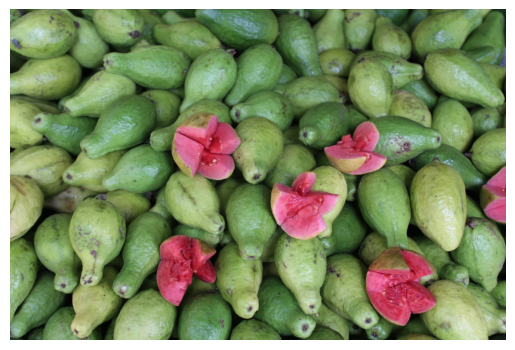

In [117]:
# view image
img = view_random_image("fruits","/quava")

In [64]:
img.shape

(2304, 3456, 3)

In [60]:
from skimage.io import imread
from skimage.transform import resize


In [120]:
class_names=['apple','orange','quava']
X=[]
y=[]
images=[]

for name in class_names:
    class_num = class_names.index(name)
    path  =os.path.join(dir_name,name)
    for img in os.listdir(path):
        image = imread(os.path.join(path,img))
        image = resize(image,(224,224,3))
        X.append(image.flatten()) # convert the 2D array to 1D
        images.append(image)
        y.append(class_num) # the class labels
# convert to numpy array

X= np.array(X)
y= np.array(y)
images=np.array(images)
        
    

In [122]:
X.shape

(90, 150528)

In [123]:
y.shape

(90,)

In [124]:
from sklearn.model_selection import train_test_split 

In [126]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [127]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
# check image format
# from PIL import Image
# for i in os.listdir(dir_name):
#     path = os.path.join(dir_name,i)
#     for j in os.listdir(path):
#         name,ext = os.path.splitext(j)
#         if ext=='.png':
#             os.remove(j)
          

In [128]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [129]:
pred = model.predict(X_test)
pred

array([1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0])

In [94]:
from PIL import Image

In [98]:

def convert_png_to_jpeg(folder_path):
    try:
        # List all files in the folder
        files = os.listdir(folder_path)
        
        # Filter PNG files
        png_files = [file for file in files if file.lower().endswith('.png')]

        for png_file in png_files:
            # Open each PNG image
            with Image.open(os.path.join(folder_path, png_file)) as img:
                # Construct the output JPEG filename
                jpeg_file = os.path.splitext(png_file)[0] + '.jpg'
                # Save as JPEG
                img.convert("RGB").save(os.path.join(folder_path, jpeg_file), "JPEG")
                
            # Optional: Remove the original PNG file
            # os.remove(os.path.join(folder_path, png_file))
                
        print("Conversion successful!")
    except Exception as e:
        print(f"Conversion failed: {e}")

# Replace 'folder_path' with the path to your folder containing PNG files
folder_path = 'fruits/orange'

# Call the function to convert PNG to JPEG
convert_png_to_jpeg(folder_path)


Conversion successful!
